# Analysis of noisy purification

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn
from scipy.optimize import fsolve

import main_1GnB as main

---
---
## Bounds on the availability

In [2]:
# x-axis
varying_param = 'x'
varying_array = np.linspace(0,1,50)

# Parameters
p_gen = 0.1
n = 5
p_con = 0.5
Gamma = 0.05

savefig = True

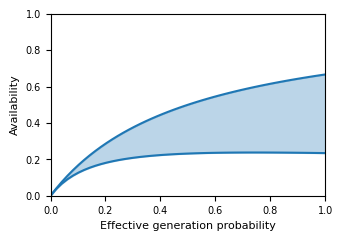

In [47]:
upp_vec = []
low_vec = []

for varying_value in varying_array:
    x = 1 - (1-p_gen)**n
    if varying_param == 'x':
        x = varying_value
    elif varying_param == 'p_gen':
        p_gen = varying_value
    elif varying_param == 'n':
        p_gen = varying_value
    elif varying_param == 'p_con':
        p_con = varying_value
    elif varying_param == 'Gamma':
        Gamma = varying_value
    
    gamma = np.exp(Gamma)-1
    xi = (gamma+p_con)*p_con
    xi1 = 1 + 2*gamma + (2-gamma)*p_con - 2*p_con**2
    xi2 = 2*(1-p_con)**2
    
    upper_bound = x / (x+p_con)
    lower_bound = x*(gamma+p_con) / (xi + xi1*x + xi2*x**2)
    
    upp_vec += [upper_bound]
    low_vec += [lower_bound]
    
## PLOT ##
xfig = 9 # cm
yfig = 6 # cm
fontsize_labels = 8

# Plot
fig, ax = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
plt.plot(varying_array, upp_vec, color='tab:blue')
plt.plot(varying_array, low_vec, color='tab:blue')
plt.fill_between(varying_array, upp_vec, low_vec,
                 color='tab:blue', alpha=0.3)
#plt.fill_between(varying_array, upp_vec, low_vec, hatch='//',
#                 color='None', edgecolor='tab:blue', alpha=0.2)

# Limits
plt.xlim([varying_array[0],varying_array[-1]])
plt.ylim([0,1])

# Labels and ticks
if varying_param == 'x':
    xlab = 'Effective generation probability'
elif varying_param == 'p_gen':
    xlab = 'Generation probability'
elif varying_param == 'n':
    xlab = 'Number of B memories'
elif varying_param == 'p_con':
    xlab = 'Probability of consumption'
elif varying_param == 'Gamma':
    xlab = r'Noise $\Gamma$'
plt.xlabel(xlab, fontsize=fontsize_labels)
plt.ylabel('Availability', fontsize=fontsize_labels)
ax.tick_params(labelsize=fontsize_labels-1)

if savefig:
    filename = 'figs/bounds-A-vs-%s-pgen%.3f-n%d-pcon%.3f-G%.3f.pdf'%(varying_param,
                                                            p_gen, n, p_con, Gamma)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

---
---
## Bounds on the availability for two different $\Gamma$

In [4]:
# x-axis
varying_param = 'x'
varying_array = np.linspace(0,1,50)

# Parameters
p_gen = 0.1
n = 5
p_con = 0.7
Gamma1 = 0.1
Gamma2 = 1

savefig = True

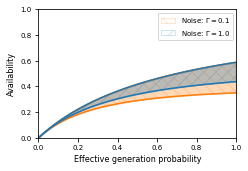

In [7]:
Gamma_vec = [Gamma1, Gamma2]
upp_vec = [[] for _ in Gamma_vec]
low_vec = [[] for _ in Gamma_vec]

for idx_Gamma, Gamma in enumerate(Gamma_vec):
    for varying_value in varying_array:
        x = 1 - (1-p_gen)**n
        if varying_param == 'x':
            x = varying_value
        elif varying_param == 'p_gen':
            p_gen = varying_value
        elif varying_param == 'n':
            p_gen = varying_value
        elif varying_param == 'p_con':
            p_con = varying_value

        gamma = np.exp(Gamma)-1
        xi = (gamma+p_con)*p_con
        xi1 = 1 + 2*gamma + (2-gamma)*p_con - 2*p_con**2
        xi2 = 2*(1-p_con)**2

        upper_bound = x / (x+p_con)
        lower_bound = x*(gamma+p_con) / (xi + xi1*x + xi2*x**2)

        upp_vec[idx_Gamma] += [upper_bound]
        low_vec[idx_Gamma] += [lower_bound]
    
## PLOT ##
xfig = 9 # cm
yfig = 6 # cm
fontsize_labels = 8
colors = ['tab:orange', 'tab:blue']
hatches = ['\\\\', '//']

# Plot
fig, ax = plt.subplots(figsize=(xfig/2.54, yfig/2.54))
for idx_Gamma, Gamma in enumerate(Gamma_vec):
    plt.plot(varying_array, upp_vec[idx_Gamma], color=colors[idx_Gamma])
    plt.plot(varying_array, low_vec[idx_Gamma], color=colors[idx_Gamma])
    plt.fill_between(varying_array, upp_vec[idx_Gamma], low_vec[idx_Gamma],
                     color=colors[idx_Gamma], alpha=0.3)
    plt.fill_between(varying_array, upp_vec[idx_Gamma], low_vec[idx_Gamma], hatch=hatches[idx_Gamma],
                     color='None', edgecolor=colors[idx_Gamma], alpha=0.2,
                     label=r'Noise: $\Gamma=$%.1f'%Gamma)

# Limits
plt.xlim([varying_array[0],varying_array[-1]])
plt.ylim([0,1])

# Labels and ticks
if varying_param == 'x':
    xlab = 'Effective generation probability'
elif varying_param == 'p_gen':
    xlab = 'Generation probability'
elif varying_param == 'n':
    xlab = 'Number of B memories'
elif varying_param == 'p_con':
    xlab = 'Probability of consumption'
elif varying_param == 'Gamma':
    xlab = r'Noise $\Gamma$'
plt.xlabel(xlab, fontsize=fontsize_labels)
plt.ylabel('Availability', fontsize=fontsize_labels)
ax.tick_params(labelsize=fontsize_labels-1)
plt.legend(fontsize=fontsize_labels-1)

if savefig:
    filename = 'figs/bounds-A-vs-%s-pgen%.3f-n%d-pcon%.3f-G%.3f-%.3f.pdf'%(varying_param,
                                                            p_gen, n, p_con, Gamma, Gamma2)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()